# CloudSplaining AWS Managed Policies (camp)

INITIAL REPORT TEXT.

First, we load the policy versions data with some slight transformations.

In [59]:
import pandas
import datetime
import matplotlib

pd = pandas.read_csv('data/versions_summary.csv')
pd['CreateDate'] = pd['CreateDate'].apply(lambda x: pandas.Timestamp(datetime.datetime.fromisoformat(x)))
pd['VersionId'] = pd['VersionId'].apply(lambda x: int(x[1:].strip()))
pd.rename(columns={'VersionId': 'Version'}, inplace=True)
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   PolicyName                  2032 non-null   object             
 1   Version                     2032 non-null   int64              
 2   IsDefaultVersion            2032 non-null   bool               
 3   CreateDate                  2032 non-null   datetime64[ns, UTC]
 4   ServiceWildcard             2032 non-null   int64              
 5   ServicesAffected            2032 non-null   int64              
 6   PrivilegeEscalation         2032 non-null   int64              
 7   ResourceExposure            2032 non-null   int64              
 8   DataExfiltration            2032 non-null   int64              
 9   CredentialsExposure         2032 non-null   int64              
 10  InfrastructureModification  2032 non-null   int64           

Let's try to get a sense of the AWS new policy publishing cadence, by measuring how many `v1` policies are published by quarter over time.

<AxesSubplot:title={'center':'Number of New Policies Created per Quarter'}, xlabel='Creation'>

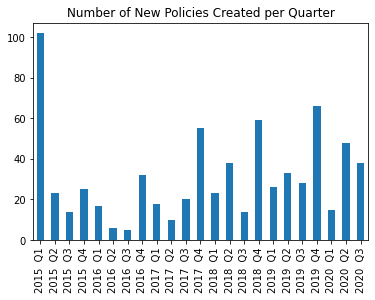

In [60]:
# policies over time panda
pot = pd[(pd['Version'] == 1)][['CreateDate', 'PolicyName']]
pot.rename(columns={'CreateDate': 'Creation', 'PolicyName': 'Policies'}, inplace=True)
pot = pot.groupby(pandas.Grouper(key='Creation', freq="Q")).size()
pot.drop(pot.index[-1], inplace=True) # delete current quarter
pl = pot.plot(kind='bar', title='Number of New Policies Created per Quarter')
pl.xaxis.set_major_formatter(lambda x, pos: f"{pot.index[x].year}  Q{pot.index[x].quarter}")
pl.xaxis.get_label().set_visible(False)
pl

Now the cadence of new versions published over time:

/Users/asieira/.virtualenvs/camp/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<AxesSubplot:title={'center':'Number of New Policy Versions Created per Quarter'}, xlabel='Creation'>

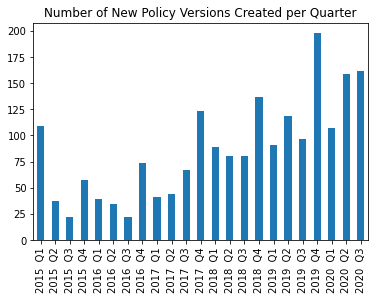

In [61]:
# policies over time panda
pot = pd[['CreateDate', 'PolicyName']]
pot.rename(columns={'CreateDate': 'Creation', 'PolicyName': 'Policies'}, inplace=True)
pot = pot.groupby(pandas.Grouper(key='Creation', freq="Q")).size()
pot.drop(pot.index[-1], inplace=True) # delete current quarter
pl = pot.plot(kind='bar', title='Number of New Policy Versions Created per Quarter')
pl.xaxis.set_major_formatter(lambda x, pos: f"{pot.index[x].year}  Q{pot.index[x].quarter}")
pl.xaxis.get_label().set_visible(False)
pl

Just out of curiosity, let's the breakdown of new version releases by month:

<ipython-input-62-b5b2135d24d6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pot['Published'] = pot['Published'].apply(lambda x: x.strftime('%b'))


<AxesSubplot:title={'center':'Policy Versions Published per Month'}, ylabel='Published'>

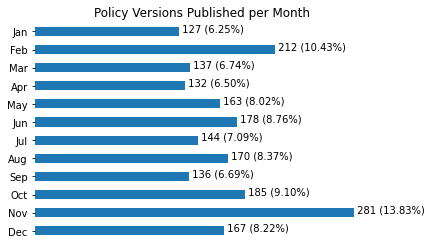

In [62]:
# policies over time panda
pot = pd[['CreateDate']]
pot.rename(columns={'CreateDate': 'Published'}, inplace=True)
pot['Published'] = pot['Published'].apply(lambda x: x.strftime('%b'))
pot = pot.groupby(['Published'], as_index=False).size()
total_versions = sum(pot['size'])
pot = pot.set_index('Published')
pot = pot.reindex(reversed(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']))
pl = pot.plot(kind='barh', title='Policy Versions Published per Month')
pl.get_legend().remove()
pl.spines['top'].set_visible(False)
pl.spines['right'].set_visible(False)
pl.spines['bottom'].set_visible(False)
pl.spines['left'].set_visible(False)
pl.xaxis.set_visible(False)
pl.yaxis.get_label().set_visible(False)
for index,data in enumerate(pot['size']):
    pl.text(y=index, x=data, s=' %d (%0.02f%%)' % (data, (data/total_versions)*100))
pl

Now let's break down the number of versions per policy:

In [71]:
from IPython.display import display, HTML
from pretty_html_table import build_table

ver = pd[['PolicyName', 'Version']].groupby('PolicyName').max()
ver.rename(columns={'Version': 'Versions', 'PolicyName': 'Policy'}, inplace=True)
ver.sort_values('Versions', ascending=False, inplace=True)
ver['Policy'] = ver.index
ver['Rank'] = range(1, ver.shape[0]+1)
ver_html = build_table(ver.head(19)[['Rank', 'Policy', 'Versions']], 'blue_light')
print(ver_html)
display(HTML(ver_html))

<p><table border="0" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th style = "background-color: #FFFFFF;font-family: Century Gothic;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 0px 20px 0px 0px">Rank</th>
      <th style = "background-color: #FFFFFF;font-family: Century Gothic;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 0px 20px 0px 0px">Policy</th>
      <th style = "background-color: #FFFFFF;font-family: Century Gothic;font-size: medium;color: #305496;text-align: left;border-bottom: 2px solid #305496;padding: 0px 20px 0px 0px">Versions</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic;font-size: medium;text-align: left;padding: 0px 20px 0px 0px">1</td>
      <td style = "background-color: #D9E1F2;font-family: Century Gothic;font-size: medium;text-align: left;padding: 0px 20px 0px 0px">ReadOnlyAcce

Rank,Policy,Versions
1,ReadOnlyAccess,71
2,AWSConfigRole,34
3,SecurityAudit,33
4,AWSConfigServiceRolePolicy,20
5,AmazonECS_FullAccess,19
6,AmazonSageMakerFullAccess,17
7,AWSElasticBeanstalkService,16
8,FMSServiceRolePolicy,16
9,AWSCodeCommitPowerUser,14
10,AWSMobileHub_FullAccess,14


array([[<AxesSubplot:title={'center':'Versions'}>]], dtype=object)

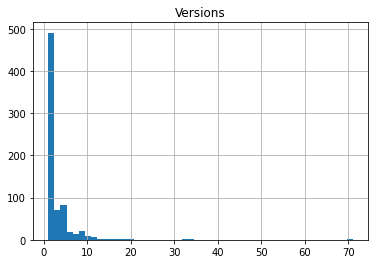

In [64]:
ver.hist(column='Versions', bins=50)

In [69]:
f"{ver[ver['Versions'] <= 5].shape[0] * 100 / ver.shape[0]}%% of policies have 5 versions or less."

'88.82758620689656%% of policies have 5 versions or less.'